In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import os
from src.load_data import load_data
from src.dwt import dwt
from src.utils import tsplot

plt.rcParams["font.family"] = ['Arial']
plt.rcParams['font.size'] = '8'
plt.rc('legend',fontsize=7)
plt.rc('legend',fontsize=7)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

# Visualisation of interpretation results

### Define results path

In [2]:
dirname = os.path.dirname(os.path.dirname(os.getcwd())) 
results_path = os.path.join(dirname, "results/interpretation")
save_path = os.path.join(dirname, "figures/interpretation")

### Load interpretation data

In [4]:
interp = pd.read_csv(os.path.join(results_path, "interpretation_ERK_Akt.csv"))
ERK_int = interp[interp["modality"] == "ERK"].sort_values("feature")
Akt_int = interp[interp["modality"] == "Akt"].sort_values("feature")

### Load time course data 

In [5]:
X_ERK, X_Akt, y, _ = load_data(os.path.join(dirname, "data/processed/mcf10a/high_dose/train"))
X_ERK_t = dwt(X_ERK, wavelet="haar", mode='constant', level=3, axis=-1)[0]/(np.sqrt(2)**3)
X_Akt_t = dwt(X_Akt, wavelet="haar", mode='constant', level=3, axis=-1)[0]/(np.sqrt(2)**3)

(-1.0, 48.0)

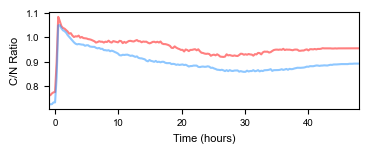

In [6]:
x = np.linspace(-1, 48, 198)
fig, ax = plt.subplots(1, 1, figsize=(4, 1.25))
ax.plot(x, np.median(X_ERK[y==1], axis=0), color="red", linewidth=1.5, label="Divided", alpha=0.5)
ax.plot(x, np.median(X_ERK[y==0], axis=0), color="dodgerblue", linewidth=1.5, label="Divided", alpha=0.5)
ax.set_ylabel("C/N Ratio")
ax.set_xlabel("Time (hours)")

ax.set_xlim(xmin=-1, xmax=48)

# plt.savefig(os.path.join(save_path, "ERK_CN.png"), dpi=500)
# plt.savefig(os.path.join(save_path, "ERK_CN.svg"), dpi=500)

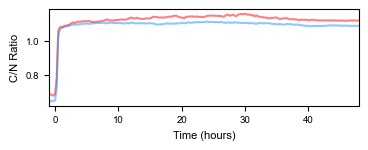

In [7]:
x = np.linspace(-1, 48, 198)
fig, ax = plt.subplots(1, 1, figsize=(4, 1.25))
ax.plot(x, np.median(X_Akt[y==1], axis=0), color="red", linewidth=1.5, label="Divided", alpha=0.5)
ax.plot(x, np.median(X_Akt[y==0], axis=0), color="dodgerblue", linewidth=1.5, label="Univided", alpha=0.5)
ax.set_ylabel("C/N Ratio")
ax.set_xlabel("Time (hours)")

ax.set_xlim(xmin=-1, xmax=48)

handles, labels = ax.get_legend_handles_labels()
plt.legend([],[], frameon=False)

# plt.savefig(os.path.join(save_path, "Akt_CN.png"), dpi=500)
# plt.savefig(os.path.join(save_path, "Akt_CN.svg"), dpi=500)

In [8]:
fig = plt.figure(figsize=(7, 2))
fig.legend(handles=handles, labels=labels, ncol = len(ax.lines))
# plt.savefig(os.path.join(save_path, "legend_divided_undivided.png"), dpi=500)
# plt.savefig(os.path.join(save_path, "legend_divided_undivided.svg"), dpi=500)

<Figure size 700x200 with 0 Axes>

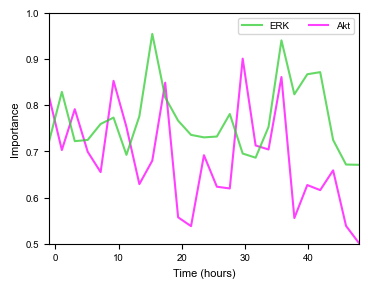

In [34]:
t = np.linspace(-1, 48, 25)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(t, 1 - ERK_int["RPS"], label="ERK", color="limegreen", linewidth=1.5, alpha=0.75, zorder=2)
ax.plot(t, 1 - Akt_int["RPS"], label="Akt", color="magenta", linewidth=1.5, alpha=0.75, zorder=1)
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Importance")
ax.set_xlim(xmin=-1, xmax=48)
ax.set_ylim(ymin=0.5, ymax=1)

plt.legend(ncol=2)

plt.savefig(os.path.join(save_path, "importance.svg"), dpi=300)


In [10]:
median_diff_ERK = X_ERK_t[y==1].median(axis=0) - X_ERK_t[y==0].median(axis=0)
median_diff_Akt = X_Akt_t[y==1].median(axis=0) - X_Akt_t[y==0].median(axis=0)

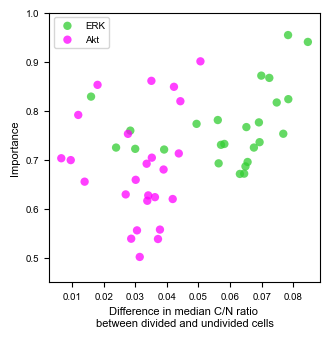

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
ax.scatter(median_diff_ERK, 1 - ERK_int["RPS"], label="ERK", color="limegreen", alpha=0.75, edgecolors='none')
ax.scatter(median_diff_Akt, 1 - Akt_int["RPS"], label="Akt", color="magenta", alpha=0.75, edgecolors='none')
ax.set_xlabel("Difference in median C/N ratio \nbetween divided and undivided cells")
ax.set_ylabel("Importance")
# ax.set_xlim(xmin=0, xmax=24)
ax.set_ylim(ymin=0.45, ymax=1)
# plt.legend(bbox_to_anchor=(1, 1))

plt.legend()

plt.savefig(os.path.join(save_path, "median_vs_importance.svg"), dpi=300)

In [12]:
spearmanr(median_diff_ERK, 1 - ERK_int["RPS"])

SignificanceResult(statistic=0.4493171846916495, pvalue=0.02424247997779293)

In [15]:
spearmanr(median_diff_Akt, 1 - Akt_int["RPS"])

SignificanceResult(statistic=0.09307692307692307, pvalue=0.6581118998948554)